# Gita Testing

In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle 
import seaborn as sns
from collections import defaultdict
from sklearn.datasets import fetch_mldata
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold

In [395]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv", nrows = 10000)
df_test = pd.read_csv("test.csv", nrows = 10000)

In [396]:
#store gap values
Y_train = df_train.gap.values
#Y_test = df_test.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [397]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)

In [398]:
from __future__ import print_function
from rdkit import Chem

carbons = []
carbons = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('c')))
df_all['carbons'] = pd.DataFrame(carbons)

double = []
double = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('=')))
df_all['double'] = pd.DataFrame(double)

single = []
single = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('-')))
df_all['single'] = pd.DataFrame(single)

nitrogen = []
nitrogen = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('n')))
df_all['nitrogen'] = pd.DataFrame(nitrogen)

oxygen = []
oxygen = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('o')))
df_all['oxygen'] = pd.DataFrame(oxygen)

ccccc = []
ccccc = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('ccccc')))
df_all['ccccc'] = pd.DataFrame(ccccc)

ccc = []
ccc = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('ccc')))
df_all['ccc'] = pd.DataFrame(ccc)

Si = []
Si = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('Si')))
df_all['Si'] = pd.DataFrame(Si)

se = []
se = np.vstack(df_all.smiles.astype(str).apply(lambda x: x.count('se')))
df_all['se'] = pd.DataFrame(se)

In [399]:
# Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print("Train features:", X_train.shape)
print("Train gap:", Y_train.shape)
print("Test features:", X_test.shape)

Train features: (10000, 265)
Train gap: (10000,)
Test features: (10000, 265)


In [400]:
# fn that returns trained Random Forest to make predictions
def train_and_test_RF_model(X_train, Y_train):
    RF = RandomForestRegressor()
    RF.fit(X_train, Y_train)
    # return the prediction we've trained
    return RF.predict

# fn that uses PCA to reduce dimensionality
from sklearn.decomposition import PCA as PCA
def PCA_red(X_data):
    pca = PCA(n_components=20)
    pca.fit(X_data)
    X_red = pca.fit_transform(X_data)
    return X_red

# fn that predicts using reduced dimensional space
def train_and_test_PCA_model(X_red, Y_train):
    LR.fit(X_red, Y_train)
    return LR.predict

In [401]:
# test RF model
from training_and_validation import select_best_model
select_best_model(X_train, Y_train, 4, train_and_test_RF_model)

next validation set
training
got a prediction!
next validation set
training
got a prediction!
next validation set
training
got a prediction!
next validation set
training
got a prediction!
Final error 0.22485878534181775


0.22485878534181775

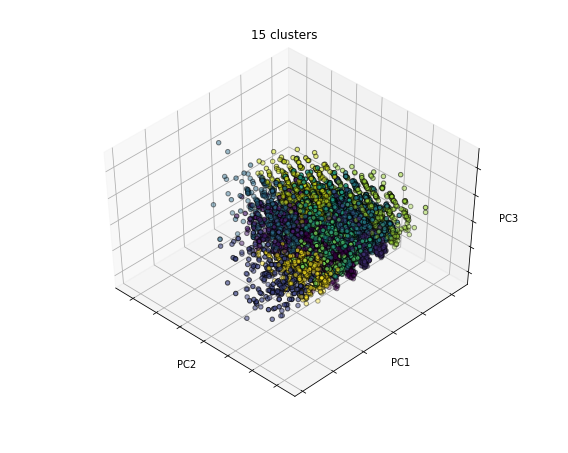

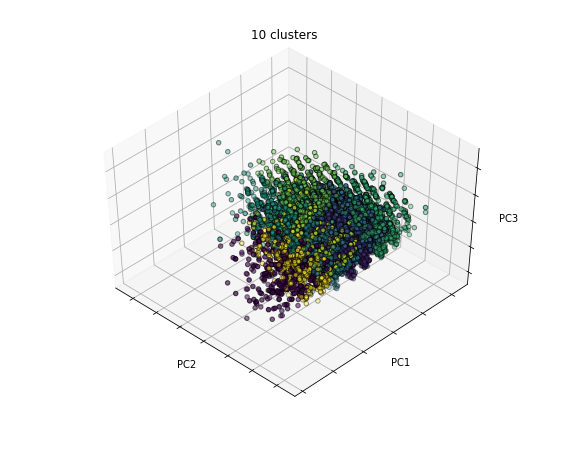

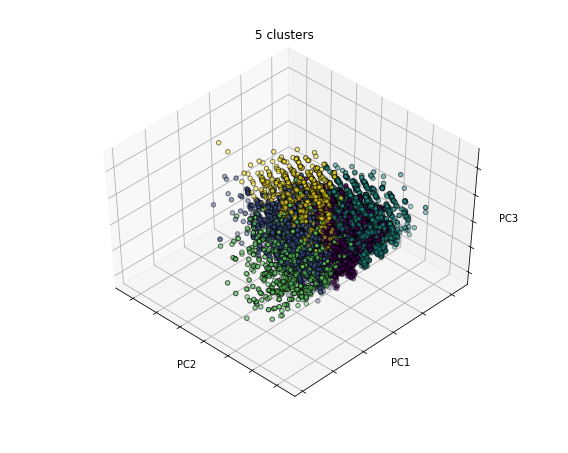

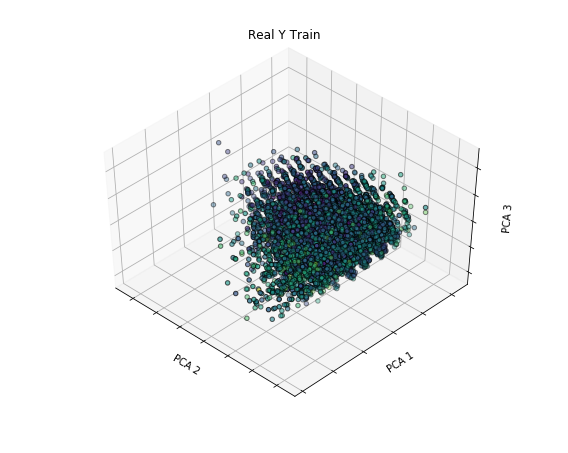

In [402]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

X_red = PCA_red(X_train)

estimators = [('k_means_15', KMeans(n_clusters=15)),
              ('k_means_iris_10', KMeans(n_clusters=10)),
              ('k_means_iris_5', KMeans(n_clusters=5))]

fignum = 1
titles = ['15 clusters', '10 clusters', '5 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_red)
    labels = est.labels_
    ax.scatter(X_red[:, 1], X_red[:, 0], X_red[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PC2')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#labels = Y_train*10-10
#y = labels.astype(np.float)
    
ax.scatter(X_red[:, 1], X_red[:, 0], X_red[:, 2], c=Y_train, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA 2')
ax.set_ylabel('PCA 1')
ax.set_zlabel('PCA 3')
ax.set_title('Real Y Train')
ax.dist = 12

plt.show()

In [403]:
#PCA shortcut 

from sklearn.decomposition import PCA as PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_red = pca.fit_transform(X_train)
LR.fit(X_red, Y_train)

#variance explained
#print(pca.explained_variance_ratio_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

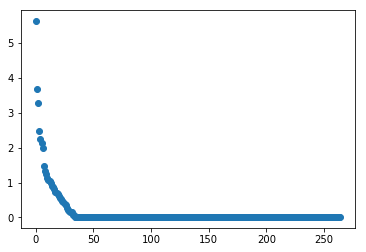

In [404]:
# PCA theory and learning:
from sklearn.preprocessing import StandardScaler

# standardize data to mean=0, var=1
X_std = StandardScaler().fit_transform(X_train)

# compute covariance matrix
cov_mat = np.cov(X_std.T)

#eigendecomposition - make real
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals = np.real(eig_vals)
eig_vecs = np.real(eig_vecs)

# Singular Vector Decomposition 
u, s, v = np.linalg.svd(X_std.T)

# select principal components
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0])
eig_pairs.reverse()
eig_vals_sorted = [x[0] for x in eig_pairs]

idx = [i for i in range(len(eig_pairs)) ]

plt.figure()
plt.scatter(idx, eig_vals_sorted)
plt.show()